2/23 - EDA (Pandas, Sframes, Graphlib, matplotib, bokeh)

Dataset: Pew Charitable Trusts 2013 Global Attitude Survey

Scope: As an American I'm more concerned with questions either asked to Americans or asked to others countries citizens about America. Thus, all questions not directly dealing with America were dropped.


In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('C:\Users\jsoley\PythonSelfStudy\soleyjh\globalattitudes.csv')
df.head()

C:\Users\jsoley\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (3,5,6,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,91,92,94,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,179,180,181,182,183,184,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,

,Unnamed: 0,PSRAID,COUNTRY,PHONETYPE,Q1,Q2,Q3,Q4,Q5,Q6,...,USR,SCREGION,RACECMB,RACETHN,RACETHN2,RACEOS,ADULTS,LL,CP,WEIGHT
0,1,100001,United States,landline,Dissatisfied,NaN,NaN,Somewhat good,Improve a little,Somewhat good,...,S,Northeast,Some other race,Other,Other,CARRIBEAN ...,3,1,1,0.498578
1,2,100002,United States,landline,Dissatisfied,NaN,NaN,Somewhat good,Improve a little,Somewhat good,...,S,South,White,"White, non-Hisp",White~Hisp,...,2,1,1,0.396828
2,3,100003,United States,landline,Dissatisfied,NaN,NaN,Somewhat bad,Remain the same,Somewhat good,...,R,Northeast,White,"White, non-Hisp",White~Hisp,...,2,1,1,1.617836
3,4,100004,United States,landline,Dissatisfied,NaN,NaN,Somewhat good,Improve a little,Somewhat good,...,S,Northeast,White,"White, non-Hisp",White~Hisp,...,1,1,1,0.814005
4,5,100005,United States,landline,Satisfied,NaN,NaN,Very bad,Improve a little,Somewhat bad,...,S,Northeast,White,"White, non-Hisp",White~Hisp,...,2,1,1,0.549454


In [4]:
# Do some basic parsing and line splicing for DataSet
#s1 = pd.Series([list(df.columns.values)], index=[range(1,762,1)])
#s1
#s2 = pd.Series([list(range(1,762,1))])
#pd.concat([s1, s2], axis=1)

#test = df.iloc[:,188]
#test

#Trim original dataset down to manageable size
df_trim = df.iloc[:, [0,2,4,7,8,9,10,11,85,86,87,88,90,91,92,93,94,96,
                      97,122,178,179,185,188,227,228,244,250,251,252,253,
                      254,273,274,275,276,277,278,279,280,310,311,384,405,
                      406,409,461,462,467,550,556,558,589,560,561,565,753]]

df_trim.head()
#def print_full(x):
#    pd.set_option('display.max_rows', len(x))
#    print(x)
#    pd.reset_option('display.max_rows')

#df_trim.head()
#df_trim.count()
#columns = pd.Series([list(df_trim.columns.values)])
#print_full(columns)

,Unnamed: 0,COUNTRY,Q1,Q4,Q5,Q6,Q7,Q8,Q21A,Q21B,...,Q181B,Q183AUS,RACE1M.1,Q188,REG,Q190PAK,PARTYLN,IDEO,Q190AUSA,SCREGION
0,1,United States,Dissatisfied,Somewhat good,Improve a little,Somewhat good,Improve a little,Worse off,Very big problem,Moderately big problem,...,NaN,NaN,Some other race,NaN,Are you ABSOLUTELY CERTAIN that you are regist...,NaN,NaN,Conservative,NaN,Northeast
1,2,United States,Dissatisfied,Somewhat good,Improve a little,Somewhat good,Remain the same,Same (Volunteered),Moderately big problem,Very big problem,...,No,NaN,"White (e.g., Caucasian, European, Irish, Itali...",NaN,Are you ABSOLUTELY CERTAIN that you are regist...,NaN,NaN,Liberal,NaN,South
2,3,United States,Dissatisfied,Somewhat bad,Remain the same,Somewhat good,Remain the same,Worse off,Moderately big problem,Moderately big problem,...,No,NaN,"White (e.g., Caucasian, European, Irish, Itali...",NaN,Are you ABSOLUTELY CERTAIN that you are regist...,NaN,NaN,Moderate,NaN,Northeast
3,4,United States,Dissatisfied,Somewhat good,Improve a little,Somewhat good,Remain the same,Better off,Moderately big problem,Moderately big problem,...,No,NaN,"White (e.g., Caucasian, European, Irish, Itali...",NaN,Are you NOT registered to vote at your current...,NaN,NaN,Moderate,NaN,Northeast
4,5,United States,Satisfied,Very bad,Improve a little,Somewhat bad,Improve a little,Worse off,Small problem,Very big problem,...,NaN,NaN,"White (e.g., Caucasian, European, Irish, Itali...",NaN,Are you ABSOLUTELY CERTAIN that you are regist...,NaN,NaN,Conservative,NaN,Northeast


In [5]:
t = df_trim["COUNTRY"]
t.value_counts()

China                      3226
Pakistan                   1201
Italy                      1105
Nigeria                    1031
Germany                    1025
Britain                    1012
France                     1004
United States              1002
Greece                     1000
Jordan                     1000
Mexico                     1000
Spain                      1000
Egypt                      1000
Tunisia                    1000
Lebanon                    1000
Turkey                     1000
Venezuela                  1000
Indonesia                  1000
Russia                      996
Brazil                      960
Israel                      922
Malaysia                    822
Argentina                   819
South Africa                815
Palestinian territories     810
South Korea                 809
Philippines                 804
Uganda                      800
Bolivia                     800
Senegal                     800
Poland                      800
Chile   

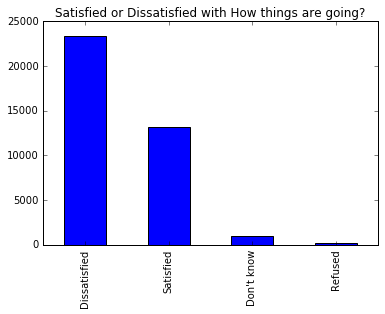

In [7]:
df_trim.Q1.value_counts().plot(kind='bar')
plt.title('Satisfied or Dissatisfied with How things are going?')

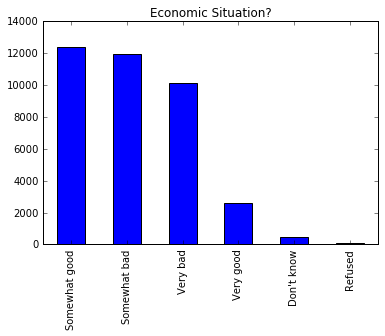

In [8]:
df_trim.Q4.value_counts().plot(kind='bar')
plt.title('Economic Situation?')

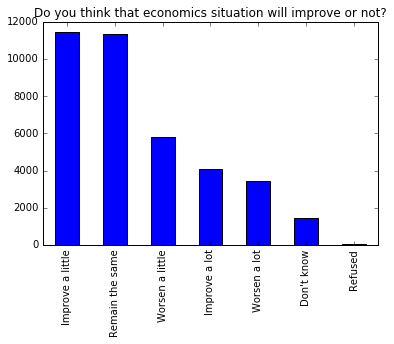

In [9]:
df_trim.Q5.value_counts().plot(kind='bar')
plt.title('Do you think that economics situation will improve or not?')

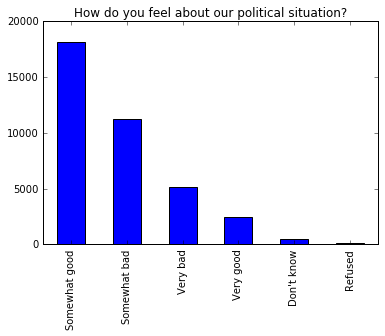

In [13]:
df_trim.Q6.value_counts().plot(kind='bar')
plt.title('How do you feel about our political situation?')

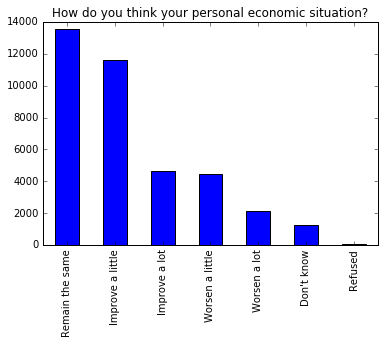

In [14]:
df_trim.Q7.value_counts().plot(kind='bar')
plt.title('How do you think your personal economic situation?')

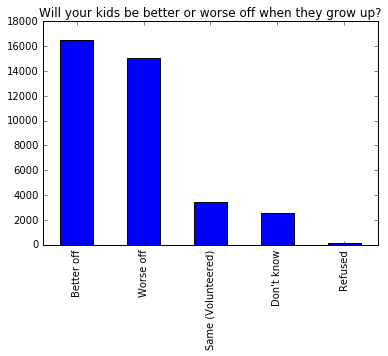

In [15]:
df_trim.Q8.value_counts().plot(kind='bar')
plt.title('Will your kids be better or worse off when they grow up?')

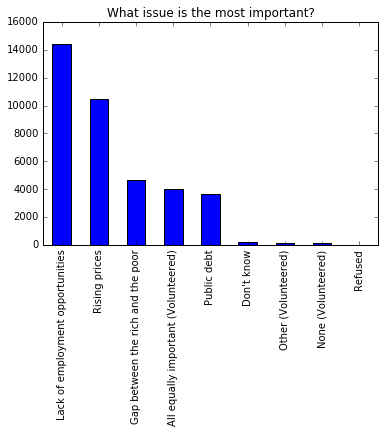

In [21]:
#test = df.iloc[:,[12,13,14,15]]
#test.head()

df.Q22.value_counts().plot(kind='bar')
plt.title('What issue is the most important?')

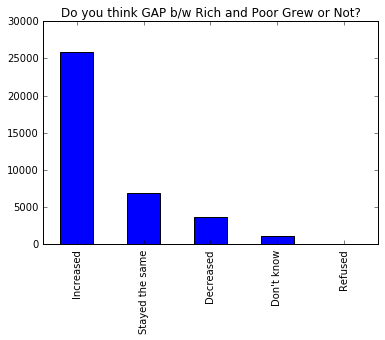

In [23]:
df.Q24.value_counts().plot(kind='bar')
plt.title('Do you think GAP b/w Rich and Poor Grew or Not?')

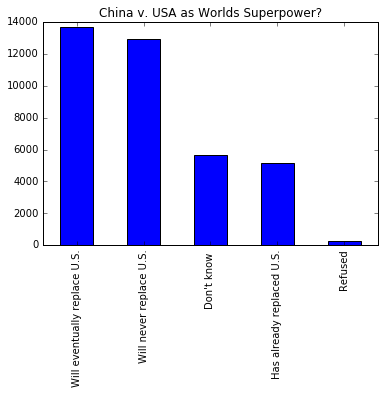

In [24]:
df.Q30.value_counts().plot(kind='bar')
plt.title('China v. USA as Worlds Superpower?')

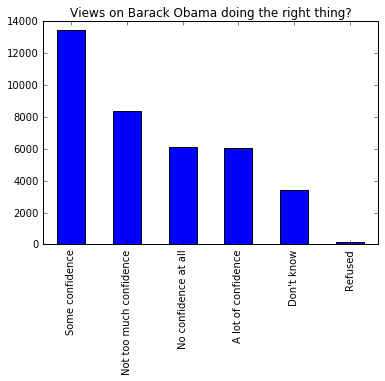

In [25]:
df.Q38.value_counts().plot(kind='bar')
plt.title('Views on Barack Obama doing the right thing?')

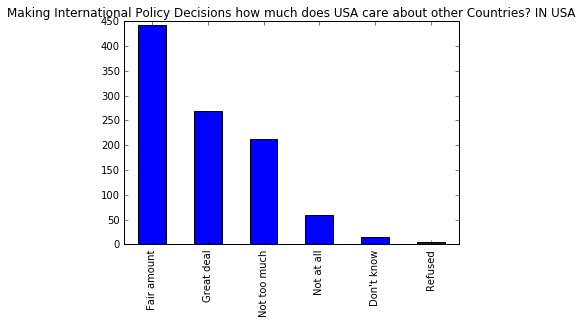

In [30]:
df.Q47US.value_counts().plot(kind='bar')
plt.title('Making International Policy Decisions how much does USA care about other Countries? IN USA')

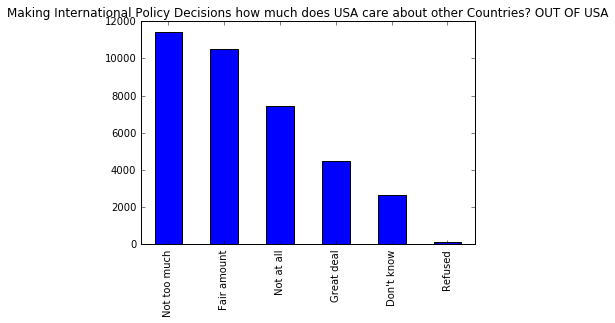

In [29]:
df.Q47.value_counts().plot(kind='bar')
plt.title('Making International Policy Decisions how much does USA care about other Countries? OUT OF USA')

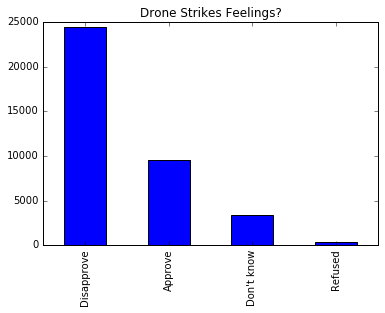

In [31]:
df.Q53.value_counts().plot(kind='bar')
plt.title('Drone Strikes Feelings?')

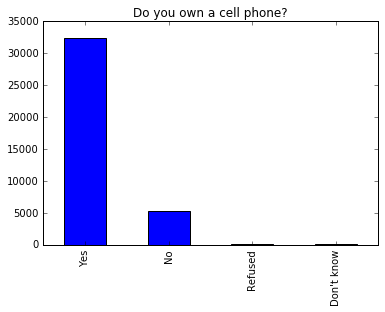

In [38]:
df.Q67.value_counts().plot(kind='bar')
plt.title('Do you own a cell phone?')

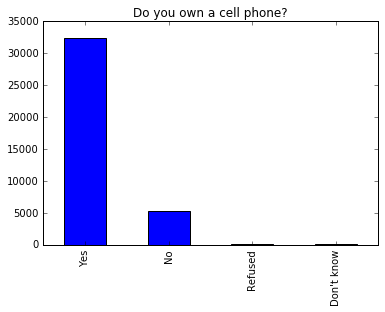

In [61]:
df.Q67.value_counts().plot(kind='bar')
plt.title('Do you own a cell phone?')

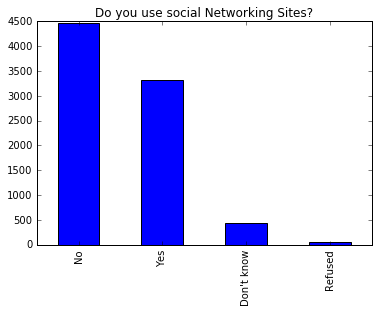

In [39]:
df.Q75.value_counts().plot(kind='bar')
plt.title('Do you use social Networking Sites?')

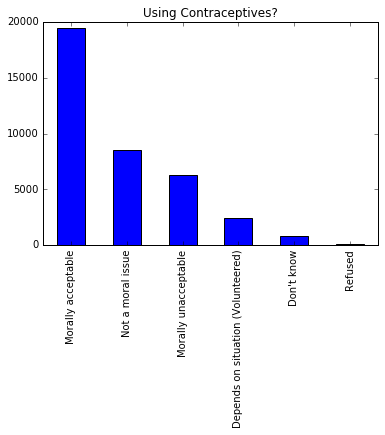

In [40]:
df.Q84A.value_counts().plot(kind='bar')
plt.title('Using Contraceptives?')

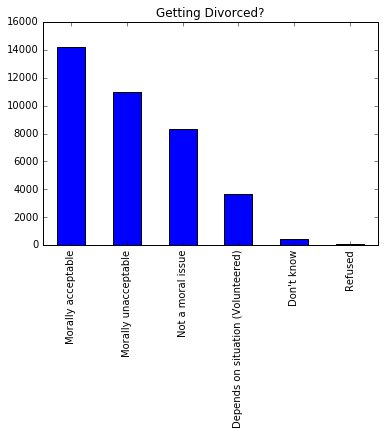

In [41]:
df.Q84B.value_counts().plot(kind='bar')
plt.title('Getting Divorced?')

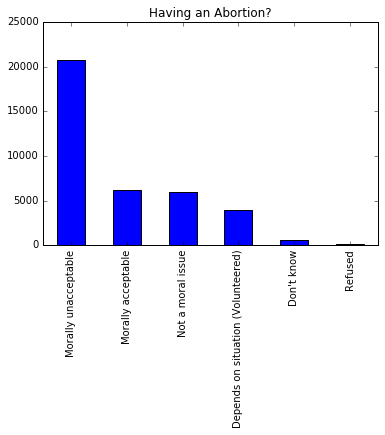

In [42]:
df.Q84C.value_counts().plot(kind='bar')
plt.title('Having an Abortion?')

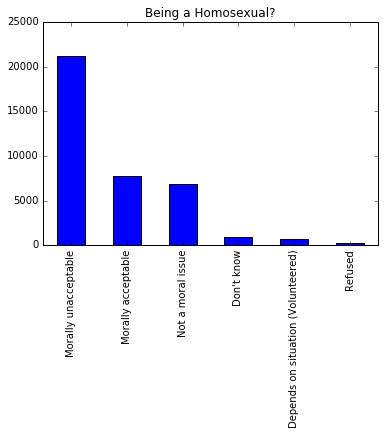

In [43]:
df.Q84D.value_counts().plot(kind='bar')
plt.title('Being a Homosexual?')

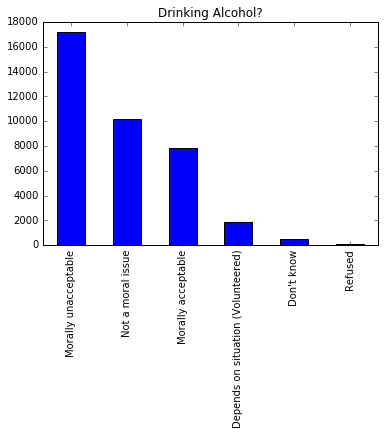

In [44]:
df.Q84E.value_counts().plot(kind='bar')
plt.title('Drinking Alcohol?')

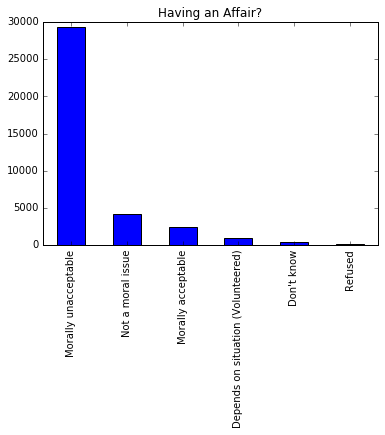

In [45]:
df.Q84F.value_counts().plot(kind='bar')
plt.title('Having an Affair?')

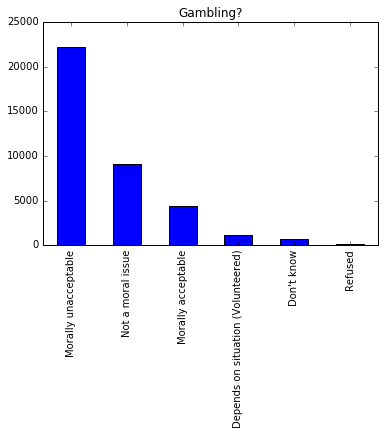

In [47]:
df.Q84G.value_counts().plot(kind='bar')
plt.title('Gambling?')

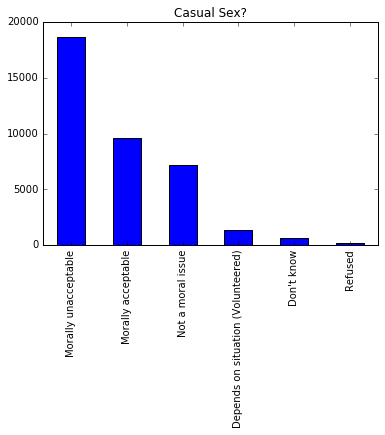

In [48]:
df.Q84H.value_counts().plot(kind='bar')
plt.title('Casual Sex?')

In [50]:
df.Q165.value_counts()

30    1066
40    1028
24    1012
25     999
18     950
22     944
28     919
32     888
23     885
27     883
29     880
35     879
50     879
20     859
19     857
26     818
34     804
45     799
38     791
21     778
33     769
42     737
39     720
31     713
36     710
37     710
43     688
48     668
55     654
47     641
      ... 
67     275
69     240
75     235
73     223
72     208
71     187
74     184
76     130
80     121
77     113
78     108
99      88
82      87
79      81
83      59
81      54
85      49
84      49
86      49
87      32
90      18
88      17
89      13
92       9
91       6
98       5
94       4
97       3
93       2
95       1
Name: Q165, dtype: int64

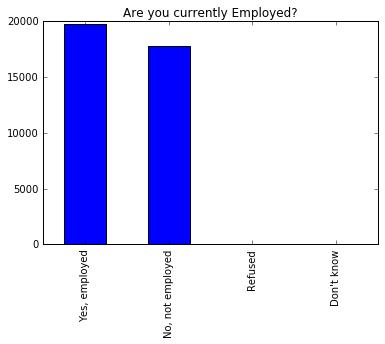

In [51]:
df.Q181.value_counts().plot(kind='bar')
plt.title('Are you currently Employed?')

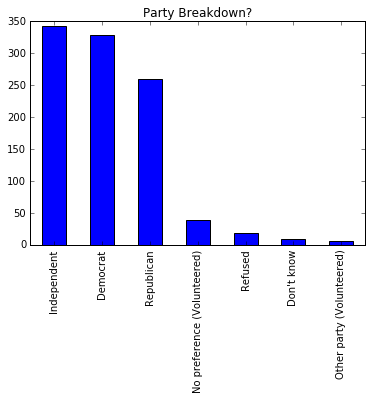

In [60]:
df.PARTY.value_counts().plot(kind='bar')
plt.title('USA Party Breakdown?')

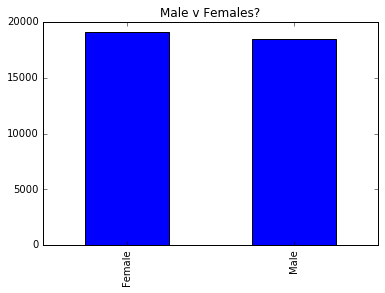

In [10]:
#df_trim.Q164.value_counts().plot(kind='bar')
plt.title('Male v Females?')

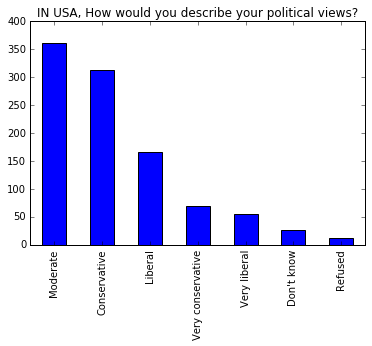

In [11]:
df_trim.IDEO.value_counts().plot(kind='bar')
plt.title('IN USA, How would you describe your political views?')

In [71]:
#Create all Variables as Factor Variables for SKLEARN
#from sklearn.cross_validation import cross_val_score

from sklearn.tree import DecisionTreeClassifier, export_graphviz

Q1 = pd.Series(df.Q1, dtype="category")
Q4 = pd.Series(df.Q4, dtype="category")
#Q5 = pd.Series(df.Q5, dtype="category")
#Q6 = pd.Series(df.Q6, dtype="category")
#Q7 = pd.Series(df.Q7, dtype="category")
#Q8 = pd.Series(df.Q8, dtype="category")

#y = df["Q1"]
#X = df["Q4"]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(Q1, Q4)



#dt = 


#Q21A = pd.Series(df.Q21A, dtype="category")
#Q21B = pd.Series(df.Q8, dtype="category")
#Q21C = pd.Series(df.Q8, dtype="category")
#Q21D = pd.Series(df.Q8, dtype="category")

#Q22 = pd.Series(df.Q21A, dtype="category")
#Q21B = pd.Series(df.Q164, dtype="category")

ValueError: could not convert string to float: Dissatisfied